In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import preprocessor as p
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import TweetTokenizer
import nltk
import re
import string
import inflect
from tqdm import tqdm

In [22]:
#import database
df = pd.read_csv("../Database/IMDB Dataset Cleaned.csv")
df = df[['cleaned_review', 'sentiment']]

In [23]:
#replace positive with 1 and negative with 0
df['sentiment'] = df['sentiment'].replace({'positive': 1, 'negative': 0})

# **Logistic Regression**

In [24]:
#logistic regression model for positive and negative reviews, positive = 1, negative = 0 using sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#split data into training and testing 70/30
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_review'], df['sentiment'], random_state=0)

#vectorize the data
vect = CountVectorizer().fit(X_train)

#transform the data
X_train_vectorized = vect.transform(X_train)

In [25]:
#train model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

c:\Users\juanc\anaconda3\envs\Sentiflix\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
#test model
predictions = model.predict(vect.transform(X_test))

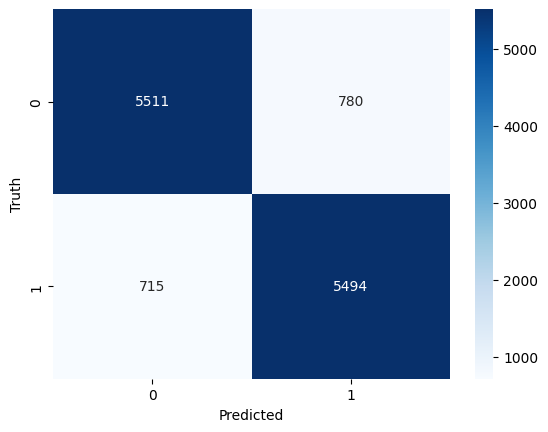

In [31]:
#confusion matrix
from sklearn.metrics import confusion_matrix

#use seaborn to plot confusion matrix
import seaborn as sns
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
#axis labels
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [33]:
#accuracy score and classification report
from sklearn.metrics import accuracy_score, classification_report
print('Classification Report: ', classification_report(y_test, predictions))

#accuracy score in percentage
print('Accuracy Score: ', accuracy_score(y_test, predictions)*100, '%')

Classification Report:                precision    recall  f1-score   support

           0       0.89      0.88      0.88      6291
           1       0.88      0.88      0.88      6209

    accuracy                           0.88     12500
   macro avg       0.88      0.88      0.88     12500
weighted avg       0.88      0.88      0.88     12500

Accuracy Score:  88.03999999999999 %
